# Golden Section Search
함수 $f(x)$가 최소가 되게 하는 $x$를 찾는 알고리즘으로 bisection method와 거의 동일하다.

1. 최소값이 포함된 구간 $[x_l, x_u]$를 잡는다.
2. 양 끝점에 대해  $x_1=x_l+d$, $x_2=x_u-d$를 계산한다.
    - $d=(\phi -1)(x_u-x_l)$, $\phi = \frac{1+\sqrt5}{2}$
    - 만약 $f(x_1)<f(x_2)$이면 $x_l=x_2$, $x_2=x_1$ 아니면 $x_u=x_1$, $x_1=x_2$
3. $\epsilon_a = (2 - \phi) |\frac{x_u-x_l}{x_{opt}}| < \text{tol}$이 될 때까지 반복, `tol`은 허용오차, $x_{opt}$는 $x_1$, $x_2$ 중 함수값이 작은 값

## 장단점
- 해를 찾는 것이 아닌, 최소가 되게 하는 $x$를 찾는 알고리즘이다.
- 최소가 포함된 구간을 설정할 수 있어야 한다.

# 코드 구현

In [1]:
class gss:
    
    def __init__(self, a, b, func, tol=1e-6):
        self.xl = a
        self.xu = b
        self.func = func
        self.tol = tol
        
    def solve(self):
        a_history = [self.xl]
        b_history = [self.xu]
        
        phi = (1+5**0.5)/2
        
        d = (phi-1)*(self.xu - self.xl)
        x1 = self.xl+d
        x2 = self.xu-d
        while True:
            # 허용범위 이내일 때
            fxl = self.func(self.xl)
            fxu = self.func(self.xu)
            if fxl < fxu:
                xopt = self.xl
            else:
                xopt = self.xu
            epsilon = (2 - phi) * abs((self.xu-self.xl)/xopt)
            if epsilon <= self.tol:
                self.minimum = (self.xl + self.xu) / 2
                self.history = [(a, b) for (a, b) in zip(a_history, b_history)]
                return self.minimum
            

            fx1 = self.func(x1)
            fx2 = self.func(x2)
            
            if fx1 < fx2:
                self.xl = x2
                x2 = x1
                d = (phi-1)*(self.xu - self.xl)
                x1 = self.xl+d
            else:
                self.xu = x1
                x1 = x2
                d = (phi-1)*(self.xu - self.xl)
                x2 = self.xu-d
            
            
            
            a_history.append(self.xl)
            b_history.append(self.xu)

In [2]:
import math

def f(x):
    return math.sin(math.cos(math.exp(x)))

In [3]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(-2, 2+0.01, 0.01)
ys = np.array([f(x) for x in xs])

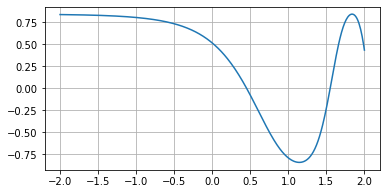

In [4]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.grid()
plt.show()

In [5]:
GSS = gss(a=0, b=1.5, func=f)

In [6]:
GSS.solve()

1.144730461674681

In [7]:
f(GSS.minimum)

-0.8414709848070124

In [8]:
len(GSS.history)

29

In [9]:
def g(x):
    return x**2+1

In [10]:
xs = np.arange(-1.5, 1.5+0.01, 0.01)
ys = np.array([g(x) for x in xs])

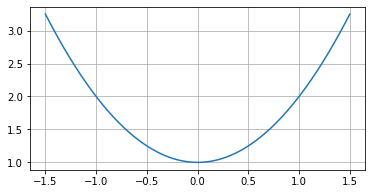

In [11]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.grid()
plt.show()

In [12]:
GSS = gss(a=-1, b=1, func=g)

In [13]:
GSS.solve()

-1.0536713272043936e-08

In [17]:
g(GSS.minimum)

1.0000000000000002

In [14]:
len(GSS.history)

68